1. Cargar librerías

In [ ]:
# ACTIVIDAD 7: Redes Neuronales Artificiales
# Equipo:
# N5 Tamara Cortes Vázquez 2055529
# N5 Alfredo Tovar Tapia 2077567
# N5 Ernesto Martínez Caballero 2110975
# N5 José Emiliano Martínez González 2043370
# N5 David Peralta Reyes 1993816
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score

2. Cargar datos

In [ ]:
keras.datasets.mnist.load_data(path="mnist.npz")

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

3. Preprocesamiento de datos

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

4. Selección y entrenamiento del modelo

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax') # Agregar la capa Densa de salida con 10 unidades (para 10 clases) y activación softmax
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', # Adam optimizer is a good default choice
              loss='sparse_categorical_crossentropy', # Use sparse_categorical_crossentropy for integer labels
              metrics=['accuracy'])

trained = model.fit(x_train, y_train, epochs=10) # Train for a few epochs

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8901 - loss: 0.3596
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9725 - loss: 0.0870
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9833 - loss: 0.0548
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9870 - loss: 0.0393
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9912 - loss: 0.0286
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9927 - loss: 0.0244
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9930 - loss: 0.0220
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9934 - loss: 0.0195
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9948 - loss: 0.0155
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9960 - loss: 0.0124


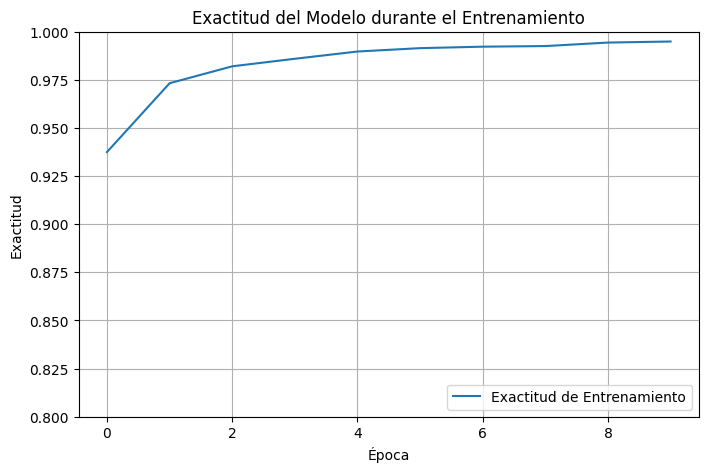

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(trained.history['accuracy'], label='Exactitud de Entrenamiento')
plt.title('Exactitud del Modelo durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Exactitud')
plt.ylim([0.8, 1]) # Ajusta el rango del eje Y si es necesario para mejor visualización
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

5. Prueba del modelo

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9764 - loss: 0.1213
Test Loss: 0.09337089210748672
Test Accuracy: 0.9803000092506409


In [ ]:
sample_images = x_test[:5]
sample_true_labels = y_test[:5]

predictions = model.predict(sample_images)

predicted_classes = np.argmax(predictions, axis=1)

for i in range(5):
    print(f"Predicción para imagen {i+1}: {predicted_classes[i]}, Valor Real: {sample_true_labels[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Predicción para imagen 1: 7, Valor Real: 7
Predicción para imagen 2: 2, Valor Real: 2
Predicción para imagen 3: 1, Valor Real: 1
Predicción para imagen 4: 0, Valor Real: 0
Predicción para imagen 5: 4, Valor Real: 4


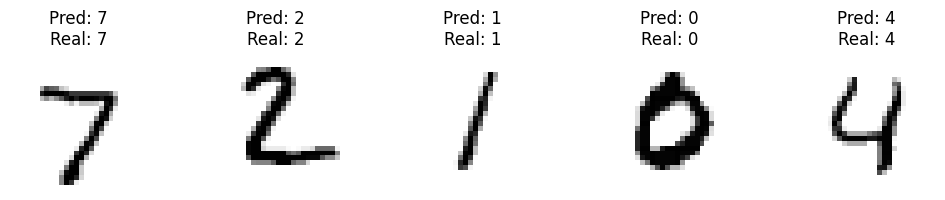

In [ ]:
plt.figure(figsize=(10, 2))
for i in range(5):
     plt.subplot(1, 5, i + 1)
     plt.imshow(sample_images[i].reshape(28, 28), cmap=plt.cm.binary)
     plt.title(f"Pred: {predicted_classes[i]}\nReal: {sample_true_labels[i]}")
     plt.axis('off')
plt.tight_layout()
plt.show()